## Decision Trees to forecast Concrete Compressive Strength

The aim of this predictive analysis is to use the machine learning model - Decision Trees to forecase Concrete Compressive Strenght based on 8 explanatory variables.

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Here is the link to dataset I will be using to build this model:https://docs.google.com/spreadsheets/d/1flQTdJf1OhYzsWh2UDMN6zQ9X0TyEv_x/edit?usp=share_link&ouid=106576591676064685048&rtpof=true&sd=true

In [4]:
#reading the dataset as a DataFrame using the Pandas module
df = pd.read_excel(r"C:\Users\Devaki\Downloads\Concrete_Data.xlsx")

## Exploratory Data Analysis

In [5]:
#examining the first 5 rows of the dataframe
df.head()

,CEM,BFS,FA,H2O,SPR,CAG,FAG,AGE,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
#checking the total number of rows and columns
df.shape

(1030, 9)

In [7]:
#checking for any null values/inconsisties within the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CEM     1030 non-null   float64
 1   BFS     1030 non-null   float64
 2   FA      1030 non-null   float64
 3   H2O     1030 non-null   float64
 4   SPR     1030 non-null   float64
 5   CAG     1030 non-null   float64
 6   FAG     1030 non-null   float64
 7   AGE     1030 non-null   int64  
 8   CCS     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe()

,CEM,BFS,FA,H2O,SPR,CAG,FAG,AGE,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
#looking at the correlation between the different variables in the data
df.corr()

,CEM,BFS,FA,H2O,SPR,CAG,FAG,AGE,CCS
CEM,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
BFS,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FA,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
H2O,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
SPR,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CAG,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FAG,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
AGE,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
CCS,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


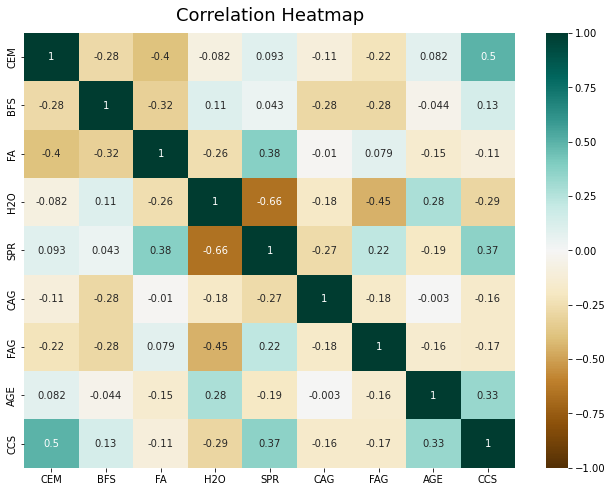

In [10]:
#creating a correlation heatmap for enhanced visualization
plt.figure(figsize=(11, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

It is important to look at correlation between independent variables when building a model. If two independent variables are highly correlated we can remove one of them from our model. We may run into issues if we keep both.

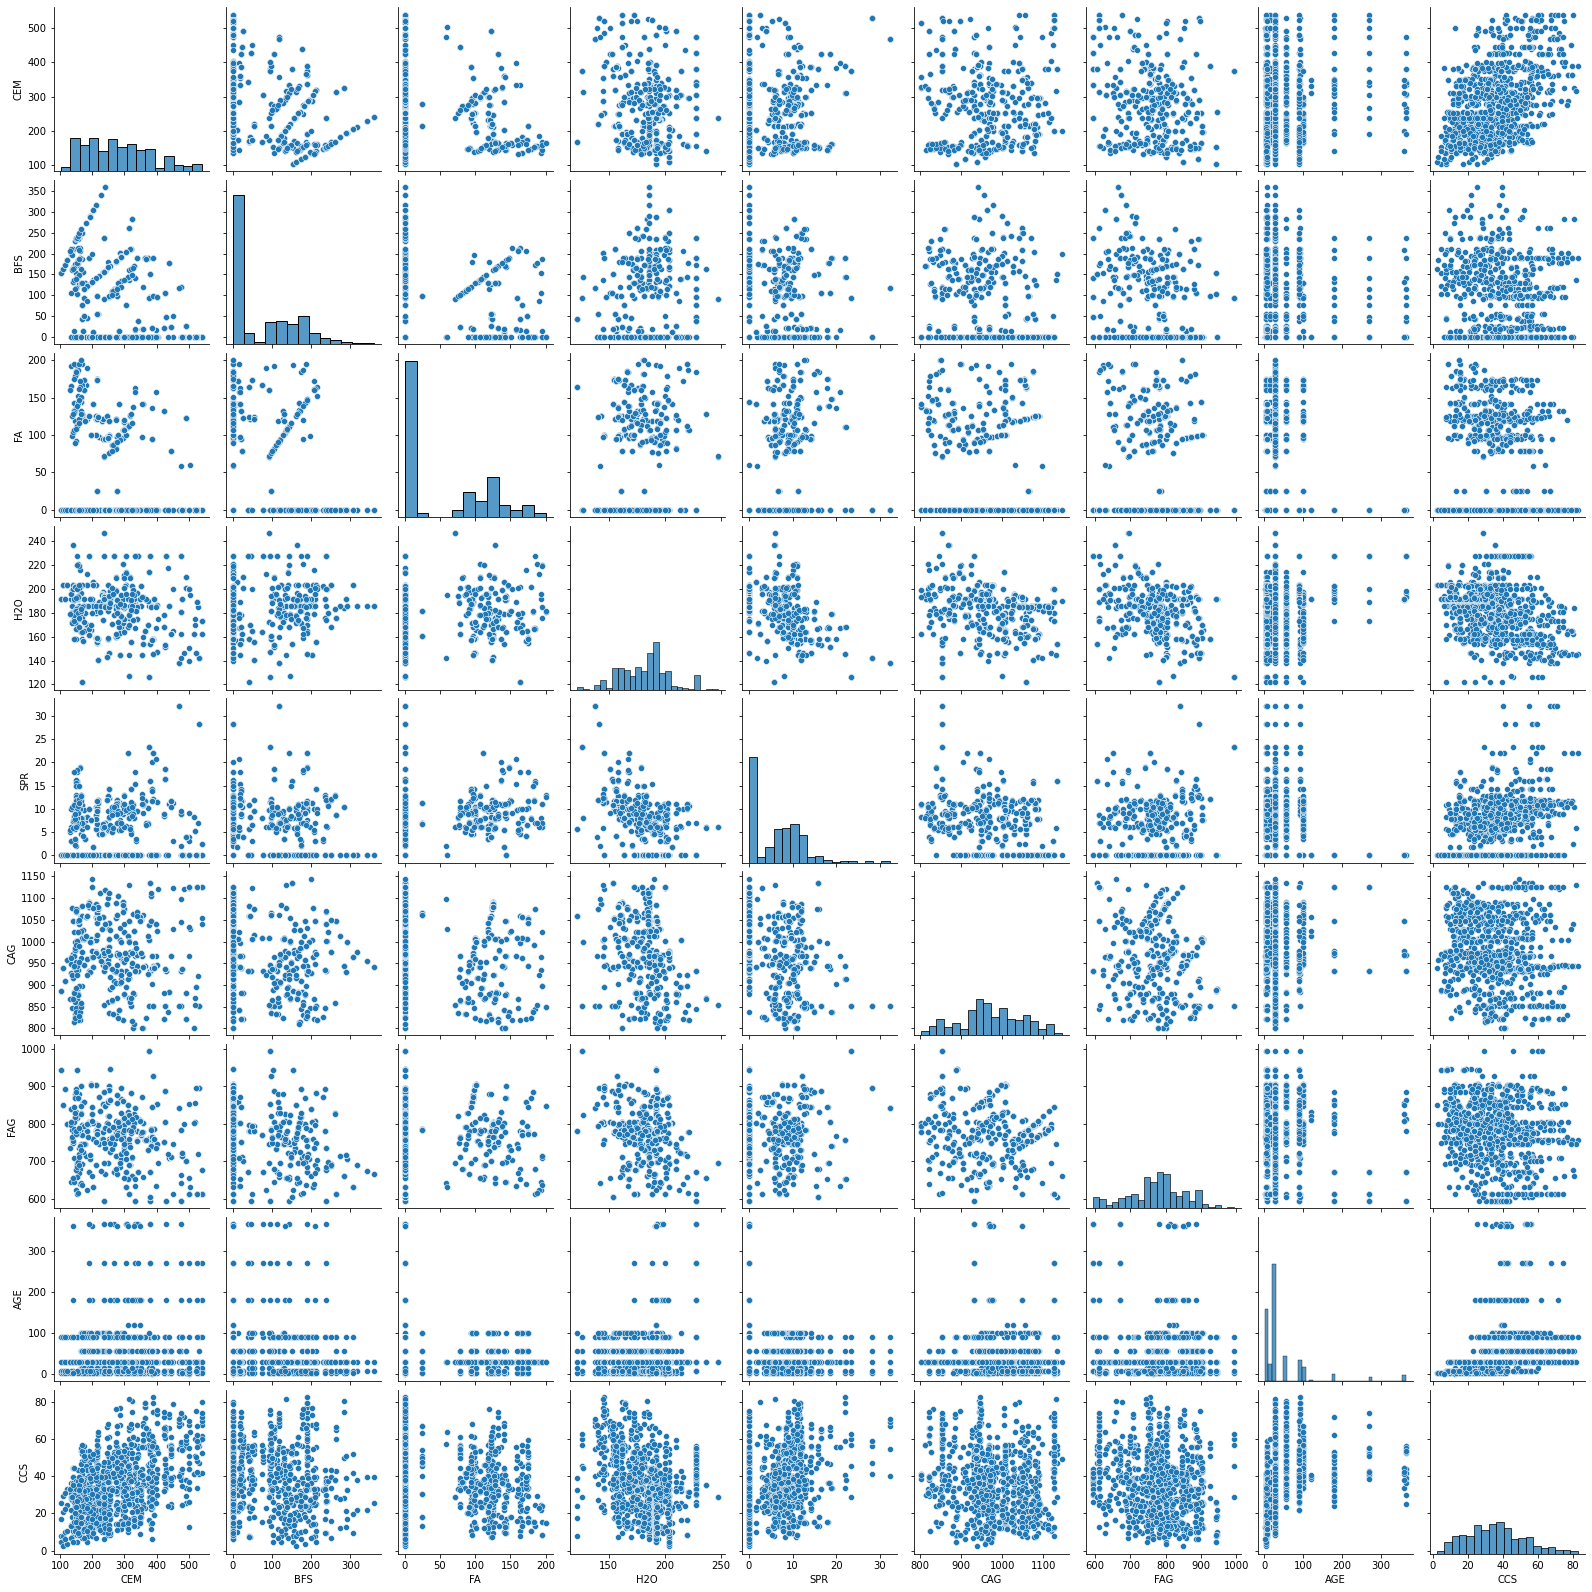

In [11]:
#Creating graphs to look at the pair-wise relationships between all our variables. 
#This will give us a good idea about how linear the relationships are in nature.
sns.pairplot(df)

C:\Users\Devaki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCS', ylabel='Density'>

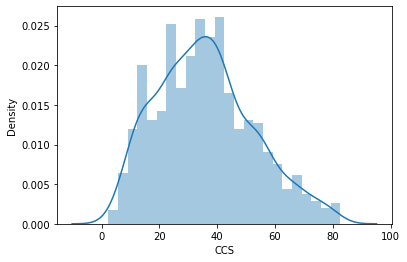

In [31]:
#examining our target variable
df = df[(df['CCS'] <= 100) & (df['CCS']>=0)]
sns.distplot(pd.Series(df['CCS']), bins=24)

C:\Users\Devaki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

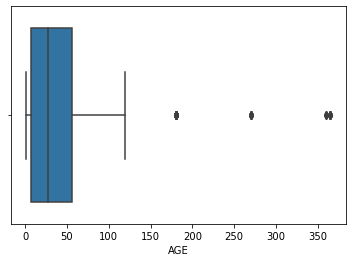

In [33]:
sns.boxplot(df['AGE'])

In [34]:
df['AGE'].describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: AGE, dtype: float64

In [42]:
#importing libraries to select the best features for our regression analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression

Our target variable here is CCS or Concrete Compressive Strength

In [39]:
#setting our X (independent) and Y (target) variables.
X = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [43]:
#scoring the features to determine which are the most important/have the highest predictive abilities
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fit= fs.fit(X,y)

In [44]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [51]:
#creating a dataframe with the feature names and their scores (ranked from highest to lowest)
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score', ascending=False)

,Features,Score
7,AGE,0.357599
3,H2O,0.353750
0,CEM,0.305472
5,CAG,0.254593
4,SPR,0.219925
6,FAG,0.209489
1,BFS,0.180194
2,FA,0.123190


<AxesSubplot:xlabel='Features', ylabel='Score'>

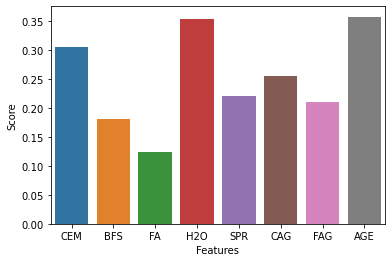

In [50]:
#visual representation of the feature scores
sns.barplot(y = 'Score', x='Features', data=features_scores)

In [14]:
#we need to split our data into training and test sets
#we do this so that we can test our model on unseen data to determine the accuracy %
#a big problem with decision tree models is that they can be subject to overfitting
#testing the model on an unseen dataset will help us determine if this is the case with our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 

In [19]:
#we are initializing our decision tree and setting the maximum depth to be 3 layers
#we will likely see the variables with the highest predictor importance - Age, H20 and CEM in our model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=3,random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

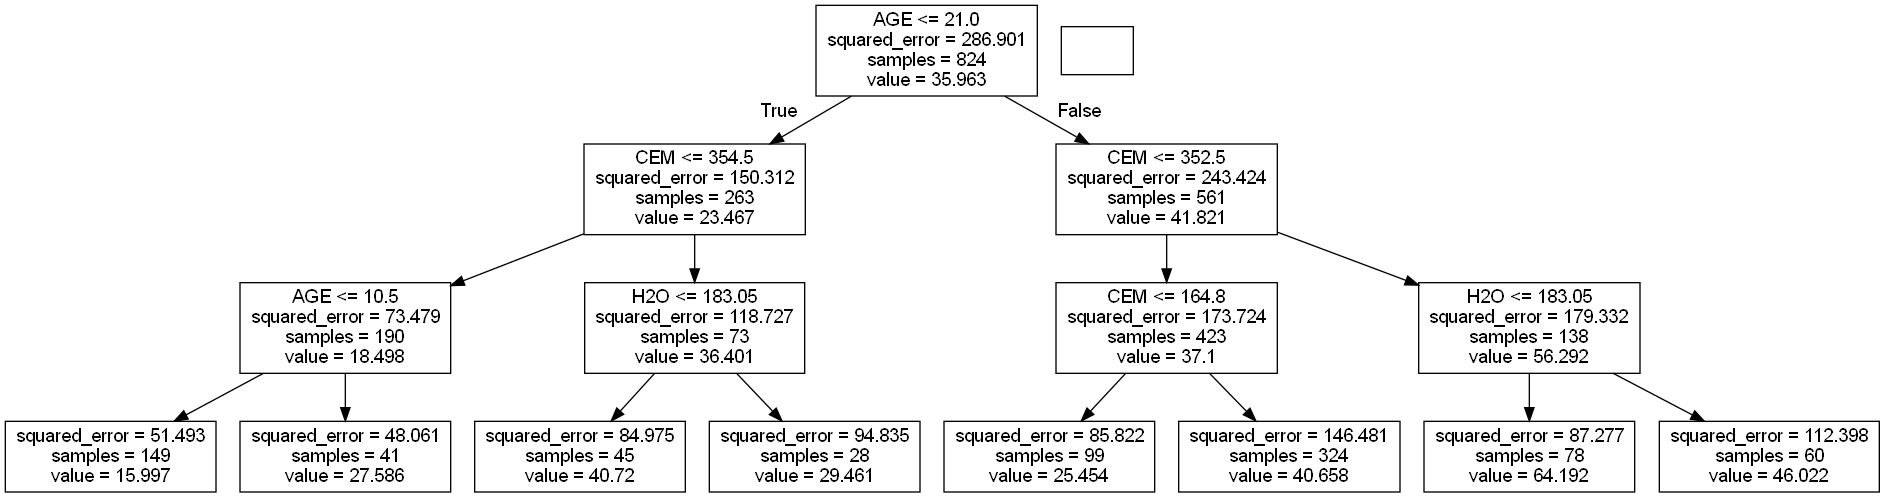

In [21]:
#creating our decision tree diagram 
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(regressor, 
                                out_file=None, 
                                feature_names=X.columns)
                                

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)))

Model			 RMSE 		 R2
LinearRegression 	 10.46 		0.56


 RMSE is generally used to measure the error of prediction, i.e. how much the predictions you made differ from the predicted data.
 Our model has an R2 of .56 or 56%, this means that 56% of variation in CCS can be explained by variations in AGE, CEM and H20.

R2 of 56% is not great, and we can improve the performance of our model by:
1. Adding more training examples to our dataset. We only have 1030 instances in this case, out of which 20% are being kept aside for testing. 
2. Adding variables with higher predictive abilities to our dataset

In [29]:
#looking at the predictor importance (this aligns with our selection of the best features)
for importance, name in sorted(zip(regressor.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

CEM 0.48256901541253205
AGE 0.42866252994721854
H2O 0.08876845464024936
SPR 0.0
FAG 0.0
FA 0.0
CAG 0.0
BFS 0.0


In [26]:
#we can further determine the accuracy of our model by comparing the predictions to the actual CCS values
#we do this by adding the predictions column to our dataframe
preds = regressor.predict(X)

predictions_df = df.assign(predictions=preds)

predictions_df.head(10)

,CEM,BFS,FA,H2O,SPR,CAG,FAG,AGE,CCS,predictions
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,64.191845
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,64.191845
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,40.657942
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,40.657942
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,40.657942
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,40.657942
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299,46.021843
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,46.021843
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291,40.657942
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,46.021843
